### 최종 실습 프로젝트
- ecommerce_sales_data.csv 파일 활용

당신은 한 온라인 쇼핑몰의 데이터 분석가로 고용되었다. 

쇼핑몰의 판매 데이터를 분석하여 고객의 구매 패턴을 파악하고, 중요한 인사이트를 도출하는 것이 이번 프로젝트의 목표다. 

이를 통해 향후 마케팅 전략을 제시하고자 한다. 

ecommerce_sales_data.csv 파일을 통해 주어진 데이터는 고객의 주문 기록, 상품 정보, 판매 데이터 등을 포함하고 있다. 

- **데이터 설명**:
    - **OrderID**: 주문 ID
    - **Product**: 주문한 상품 이름
    - **Category**: 상품의 카테고리 (예: Electronics, Clothing 등)
    - **Quantity**: 주문 수량
    - **Price**: 상품의 가격
    - **CustomerID**: 고객 ID
    - **BirthDate**: 고객 생일
    - **OrderDate**: 주문 날짜
    - **Country**: 주문한 고객의 국가
    - **DiscountRate**: 할인율

In [453]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt 

In [454]:
# 한글 폰트 
import matplotlib.font_manager as fm
import matplotlib

font_path = 'C:/Windows/Fonts/gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)

In [455]:
data = pd.read_csv('./data/ecommerce_sales_data.csv')
data

,OrderID,Product,Category,Quantity,Price,CustomerID,Birthdate,OrderDate,Country,DiscountRate
0,1,역사책,Books,5,37000,1071,1980-08-08,2024-06-10 17:18,미국,0.14
1,2,셔츠,Clothing,5,20000,1526,1967-08-09,2023-11-18 18:45,독일,0.29
2,3,노트북,Electronics,4,8000,1252,1973-04-07,2023-10-15 11:19,중국,0.23
3,4,자전거,Sports,1,8000,1670,1970-04-08,2024-07-19 2:19,일본,0.20
4,5,헤드폰,Electronics,3,26000,1838,1992-05-19,2024-01-20 20:34,대한민국,0.09
...,...,...,...,...,...,...,...,...,...,...
115,116,스마트워치,Electronics,1,33000,1508,1971-01-02,2024-03-01 16:57,독일,0.20
116,117,스마트워치,Electronics,4,41000,1645,1975-03-15,2024-01-18 21:37,대한민국,0.09
117,118,태블릿,Electronics,1,33000,1433,1965-02-01,2024-09-29 12:27,독일,0.09
118,119,청바지,Clothing,2,43000,1497,1980-04-02,2024-06-10 9:01,독일,0.06


1. **데이터 탐색 및 전처리**
    1. 데이터셋을 로드하고 상위 5개의 데이터를 출력하세요.
    2. 결측값이 있는 열이 있는지 확인하고, 결측값이 있는 경우 적절한 방법으로 처리하세요.
    3. 각 열의 데이터 타입을 확인하고, **OrderDate** 열을 datetime 형식으로 변환하세요.

In [456]:
# 1.
data.head(5)

,OrderID,Product,Category,Quantity,Price,CustomerID,Birthdate,OrderDate,Country,DiscountRate
0,1,역사책,Books,5,37000,1071,1980-08-08,2024-06-10 17:18,미국,0.14
1,2,셔츠,Clothing,5,20000,1526,1967-08-09,2023-11-18 18:45,독일,0.29
2,3,노트북,Electronics,4,8000,1252,1973-04-07,2023-10-15 11:19,중국,0.23
3,4,자전거,Sports,1,8000,1670,1970-04-08,2024-07-19 2:19,일본,0.20
4,5,헤드폰,Electronics,3,26000,1838,1992-05-19,2024-01-20 20:34,대한민국,0.09


In [457]:
# 2.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OrderID       120 non-null    int64  
 1   Product       120 non-null    object 
 2   Category      120 non-null    object 
 3   Quantity      120 non-null    int64  
 4   Price         120 non-null    int64  
 5   CustomerID    120 non-null    int64  
 6   Birthdate     120 non-null    object 
 7   OrderDate     120 non-null    object 
 8   Country       120 non-null    object 
 9   DiscountRate  119 non-null    float64
dtypes: float64(1), int64(4), object(5)
memory usage: 9.5+ KB


In [458]:
# 3.
print(data.dtypes)
# data['OrderDate'] = data['OrderDate'].astype('datetime64[ns]')
data['OrderDate'] = pd.to_datetime(data['OrderDate'])
print(data.dtypes)

OrderID           int64
Product          object
Category         object
Quantity          int64
Price             int64
CustomerID        int64
Birthdate        object
OrderDate        object
Country          object
DiscountRate    float64
dtype: object
OrderID                  int64
Product                 object
Category                object
Quantity                 int64
Price                    int64
CustomerID               int64
Birthdate               object
OrderDate       datetime64[ns]
Country                 object
DiscountRate           float64
dtype: object


2. **매출 분석**
    1. **매출액**(총 판매 금액)을 계산하는 새로운 열 `TotalRevenue`를 생성하세요.
        - 매출액 = `Quantity` * `Price`
    2. 월별 총 매출액을 집계하여 시각화하세요.
        - 힌트: `resample()`을 사용하여 월별로 데이터를 집계하세요.
    3. 카테고리별로 매출액이 가장 높은 상위 3개의 카테고리를 구하세요.
    4. 국가별 총 매출액을 계산하고, 매출액이 가장 높은 5개 국가를 출력하세요.

In [459]:
# 1.
data['TotalRevenue'] = data['Quantity'] * data['Price']

In [460]:
# 2.
total_monthly_revenue = data.resample('M', on='OrderDate')['TotalRevenue'].sum()
total_monthly_revenue

C:\Users\Playdata\AppData\Local\Temp\ipykernel_6672\2991563329.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  total_monthly_revenue = data.resample('M', on='OrderDate')['TotalRevenue'].sum()


OrderDate
2023-10-31     392000
2023-11-30     995000
2023-12-31     920000
2024-01-31     905000
2024-02-29     565000
2024-03-31     703000
2024-04-30     288000
2024-05-31     930000
2024-06-30    1365000
2024-07-31     712000
2024-08-31     635000
2024-09-30     319000
2024-10-31     190000
Freq: ME, Name: TotalRevenue, dtype: int64

In [461]:
# 3.
data.sort_values('TotalRevenue', ascending=False)['Category'].head(3)

85    Clothing
32        Food
99       Books
Name: Category, dtype: object

In [462]:
# 4.
data.groupby('Country')['TotalRevenue'].sum().head(5)

Country
대한민국    1419000
독일      1973000
미국      2238000
일본      1523000
중국      1766000
Name: TotalRevenue, dtype: int64

3. **고객 분석**
    1. 고객별로 총 매출액을 계산한 후, 상위 5명의 고객을 출력하세요.
    2. 주문 횟수가 가장 많은 상위 5명의 고객을 출력하세요.
    3. **연령대**에 따라 고객을 분류하고, 각 연령대별로 가장 많이 구매한 상품의 카테고리를 구하세요.
        - 힌트: 고객의 연령대는 따로 제공되지 않으므로, 가정 데이터를 추가해 임의로 분류할 수 있습니다.

In [463]:
# 1.
data.groupby('CustomerID')['TotalRevenue'].sum().head(5)

CustomerID
1007    334000
1029    165000
1034     49000
1038    173000
1039    138000
Name: TotalRevenue, dtype: int64

In [464]:
# 2.
data['CustomerID'].value_counts().head(5)


CustomerID
1206    2
1278    2
1496    2
1007    2
1673    2
Name: count, dtype: int64

In [465]:
# 3. 
data['Birthdate'] = pd.to_datetime(data['Birthdate'])
current_date = datetime(2025, 1, 16)

# 나이 계산 함수 
def calculate_age(birthdate, current_date):
    age = current_date.year - birthdate.year
    if (current_date.month, current_date.day) < (birthdate.month, birthdate.day):
        age -= 1  
    return age

# ➡️ 함수 적용해서 'Age' 열 추가
data['Age'] = data['Birthdate'].apply(lambda x: calculate_age(x, current_date))

 
# 나이 분류 함수 
def age_group(age):
    if age < 20:
        return '10대'
    elif age < 30:
        return '20대'
    elif age < 40:
        return '30대'
    elif age < 50:
        return '40대'
    elif age < 60:
        return '50대'
    else:
        return '60대 이상'

# ➡️ 함수 적용해서 'AgeGroup' 열 추가 
data['AgeGroup'] = data['Age'].apply(age_group)


# 1. 연령대별로 카테고리, 구매량 합계 계산
age_category_group = data.groupby(['AgeGroup', 'Category'])['Quantity'].sum().reset_index()

# 2. 연령대별로 가장 많이 구매한 카테고리 찾기 
top_categories = age_category_group.loc[age_category_group.groupby('AgeGroup')['Quantity'].idxmax()]
print(top_categories)

   AgeGroup     Category  Quantity
4       20대         Food        16
10      30대         Food        29
13      40대        Books        26
20      50대     Clothing        23
27   60대 이상  Electronics         3


4. **상품 분석**
    1. 가장 많이 판매된 상위 5개의 상품을 출력하세요.
    2. **카테고리별**로 가장 많이 판매된 상품을 찾아 출력하세요.
    3. **평균 구매 수량**이 가장 높은 상위 3개의 상품을 출력하세요.

In [466]:
# 1. 
data.groupby('Product')['Quantity'].sum().head(5)

Product
과자     16
과학책    16
노트북    15
라면     10
로션      4
Name: Quantity, dtype: int64

In [467]:
# 2. 
data.groupby('Category')['Quantity'].sum()

Category
Beauty         63
Books          68
Clothing       47
Electronics    60
Food           68
Sports         47
Name: Quantity, dtype: int64

In [468]:
# 3. 
data.groupby('Product')['Quantity'].mean().head(3)

Product
과자     2.666667
과학책    3.200000
노트북    3.000000
Name: Quantity, dtype: float64

5. **시간 분석**
    1. 주문 날짜별로 **주별** 매출액을 계산하고 시각화하세요.
    2. 특정 기간(예: 2024년 1월 ~ 2024년 6월) 동안의 매출 추이를 분석하고 시각화하세요.
    3. 특정 국가에서 가장 많이 주문한 시간대를 분석하고, 이를 시각화하여 인사이트를 도출하세요.

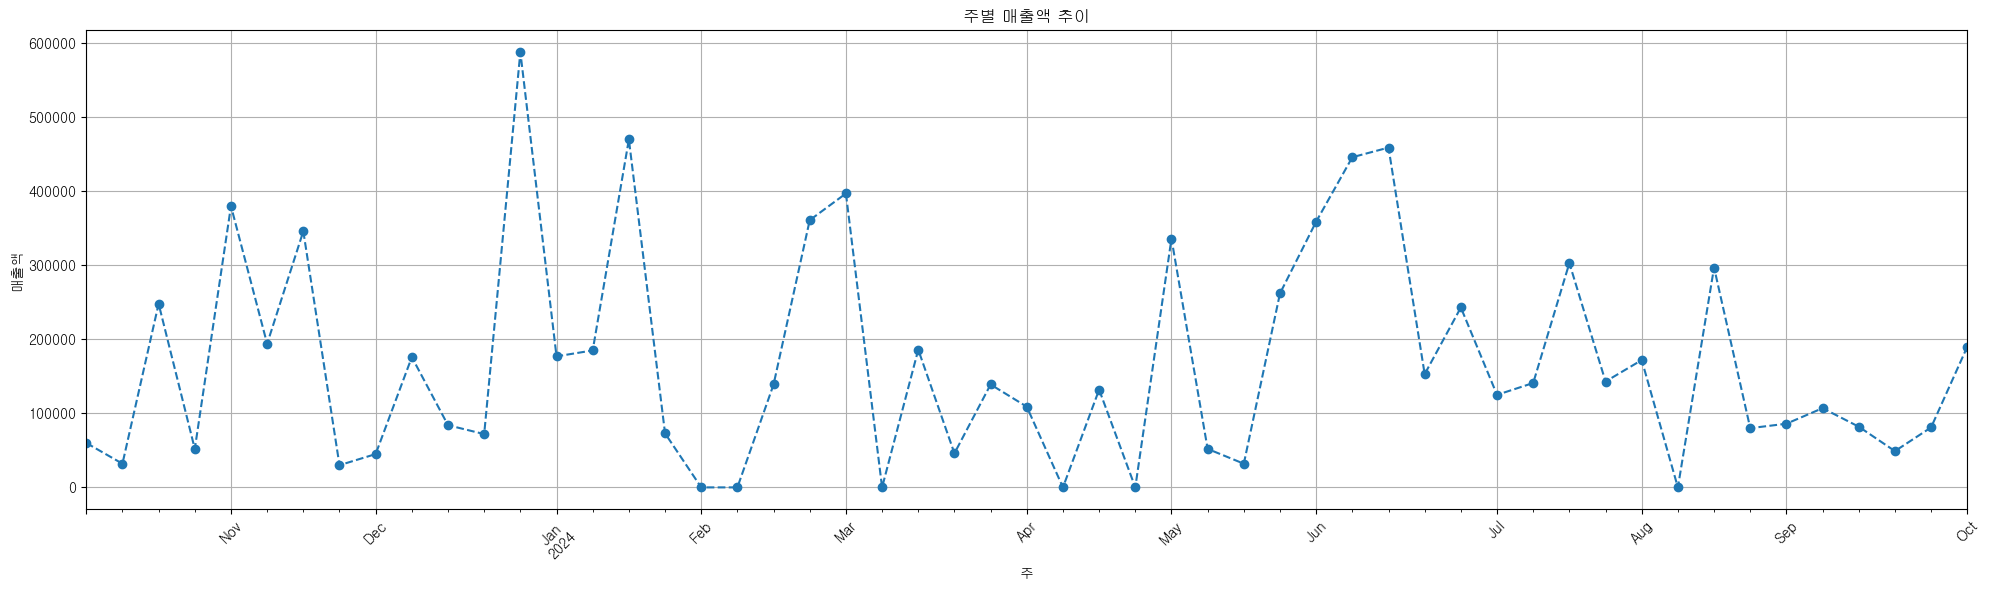

In [469]:
# 1.
total_weekly_revenue = data.resample('W', on='OrderDate')['TotalRevenue'].sum()

plt.figure(figsize=(20, 6))
total_weekly_revenue.plot(kind='line', marker='o', linestyle='--')
plt.title('주별 매출액 추이')
plt.xlabel('주')
plt.ylabel('매출액')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

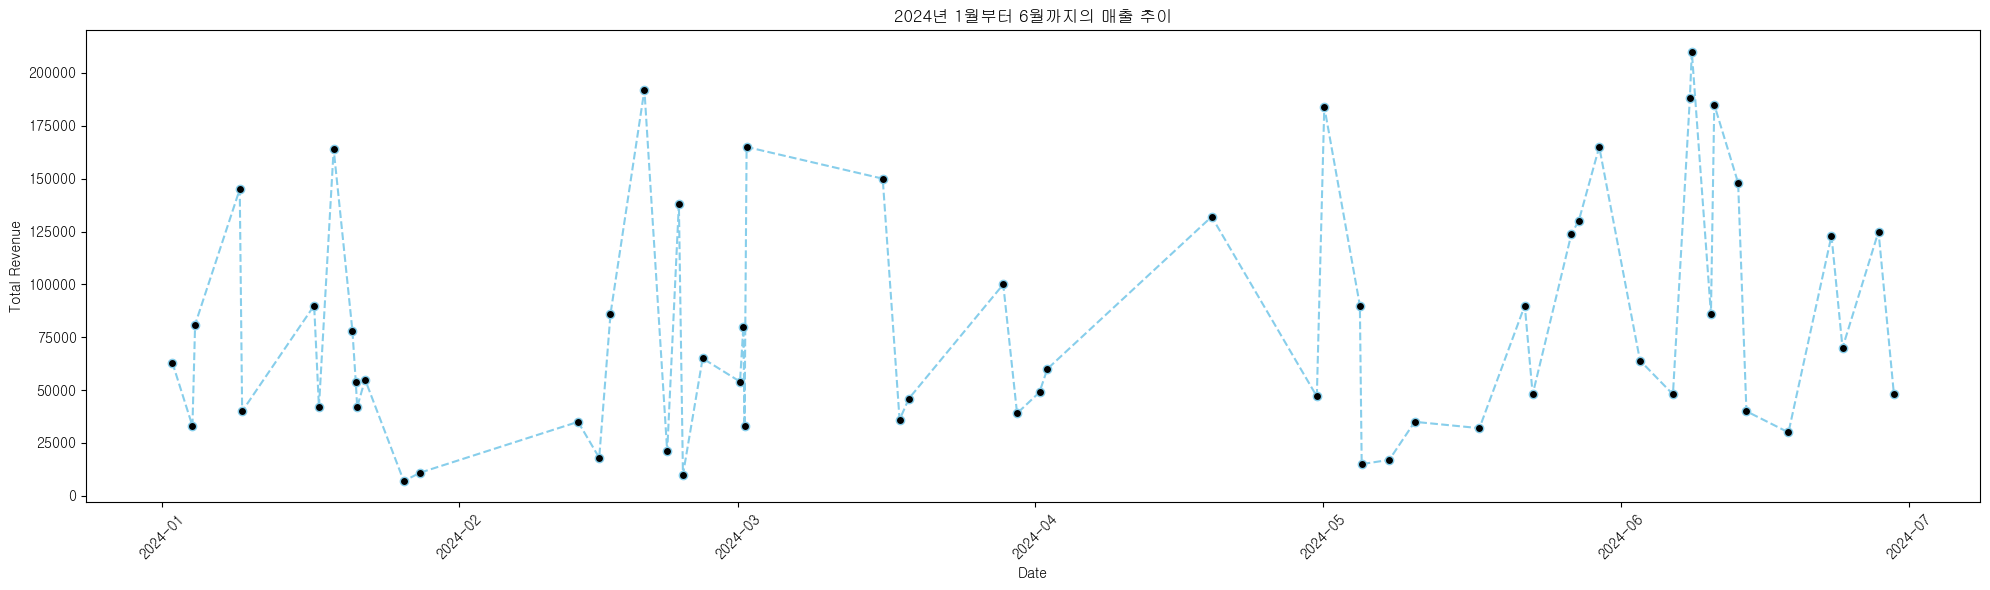

In [470]:
# 2. 특정 기간 매출 추이 
# 날짜별로 필터링
filtered_data = data[(data['OrderDate'] >= '2024-01-01') & (data['OrderDate'] < '2024-07-01')].sort_values(by= 'OrderDate', ascending=True)
# filtered_data


# 선 그래프 
plt.figure(figsize=(20, 6))
plt.plot(filtered_data['OrderDate'], filtered_data['TotalRevenue'], marker='o', markerfacecolor = 'black', color='skyblue',  linestyle='--')

plt.title('2024년 1월부터 6월까지의 매출 추이')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_6672\3065944897.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  korea_data = korea_data.set_index('OrderDate').resample('H').count()


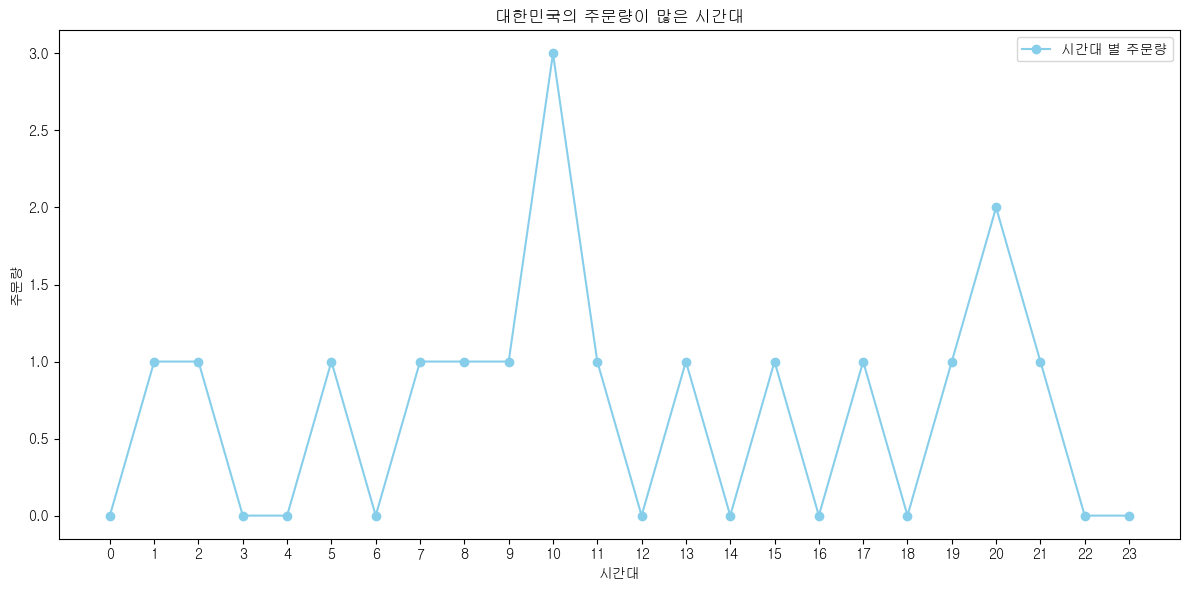

In [471]:
# 3. OrderDate를 datetime 형식으로 변환
data['OrderDate'] = pd.to_datetime(data['OrderDate'])

# 대한민국 데이터 필터링
korea_data = data[data['Country'] == '대한민국']

# 리샘플링 (시간 단위)
korea_data = korea_data.set_index('OrderDate').resample('H').count()

# 시간대 열 새로 만들어주기 
korea_data['Hour'] = korea_data.index.hour

# 시간대별 주문량 그룹화
time_grouped_data = korea_data.groupby('Hour')['OrderID'].sum()

# 주문이 없는 시간도 그래프에 표현해주기 위해, 주문이 없는 시간대에 0을 채워주기
complement_data = time_grouped_data.reindex(range(24), fill_value=0)

# 시각화
plt.figure(figsize=(12, 6))
complement_data.plot(kind='line', marker='o', color='skyblue', label='시간대 별 주문량')
plt.title('대한민국의 주문량이 많은 시간대')
plt.xlabel('시간대')
plt.ylabel('주문량')
plt.xticks(range(24))
plt.legend()
plt.tight_layout()
plt.show()


6. **추가 분석**
    1. 고객의 **재구매율**을 분석하세요.
        - 재구매율 = 한 고객이 여러 번 주문한 비율
    2. 상품 카테고리별 **할인**을 적용한 판매 데이터를 사용하여 할인율이 높은 카테고리의 매출액을 분석하세요.

In [477]:
# 1. 

# 고객별 총주문 횟수 계산
orders = data.groupby('CustomerID')['OrderID'].count()

# 재구매 고객 필터링하기 
re_customers = orders[orders >= 2]

# 전체 고객 수, 재구매 고객 수 구하기 
# total_customers = orders.shape[0]
total_customers = orders.count()
re_customer_count = re_customers.count()

# 재구매율 계산
re_rate = (re_customer_count / total_customers) * 100

print(f"전체 고객 수: {total_customers}, 재구매 고객 수: {re_customer_count}, 재구매율: {re_rate:.2f}%")


전체 고객 수: 111, 재구매 고객 수: 9, 재구매율: 8.11%


In [498]:
# 2. 
# 카테고리별 할인율의 평균 => 가장 할인율이 높은 카테고리 => 이 카테고리의 총 매출액 구하기 

# 카테고리별 할인율 평균 
avg = data.groupby('Category')['DiscountRate'].mean()

# 가장 할인율이 높은 카테고리 찾기
max_discount = avg.sort_values(ascending=False).head(1)
max_discount_category = max_discount.index[0]
max_category_revenue = data[data['Category'] == max_discount_category]['TotalRevenue'].sum()


print(f"가장 할인율이 높은 카테고리: {max_discount_category}")
print(f"{max_discount_category} 카테고리의 총 매출액: {max_category_revenue} 원")

가장 할인율이 높은 카테고리: Beauty
Beauty 카테고리의 총 매출액: 1493000 원
